In [16]:

import numpy as np
from netCDF4 import Dataset 
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
import urllib
import json

cor=pd.read_excel('confinement_index_code/confinement index 20April2020.xlsx',header=2,usecols='J:L',nrows=228)
cc_code=cor['country code']
cc_name=cor['Index scale']


In [17]:
c_c=np.load('google_cg_high_ex.npy') #Google mobility based trends
#c_c=np.load('corinne_c_low.npy') #or corrine_c for orignal data from Excel countries Edgar.ipynb
c_us=np.load('corinne_cus.npy')
c_china=np.load('corinne_cchina.npy')
b_c=np.load('corinne_b.npy')
b_us=np.load('corinne_bus.npy')
b_china=np.load('corinne_bchina.npy')

#b_c[:,:,49]=1E-10
# trans,red,pub,ind,ship,avi,avn

In [18]:
b_c[0,:,:143].sum()*356/1000

34.43557985097689

In [12]:
for i in range(143):
    print (cc_name[i],b_c[0,2,i]/b_c[0,:,i].sum(axis=0)*100,b_c[0,1,i]/b_c[0,:,i].sum(axis=0)*100)

Albania 8.576997925698947 5.068226458930936
Algeria 2.761341361726443 15.384614805025706
Angola 8.900998990037598 7.175295496462139
Argentina 7.953443754701689 11.54219293048013
Armenia 10.465116747430923 22.09302268432741
Australia 3.2692309054249766 2.307692367225855
Austria 2.901353892847352 9.767891805226272
Azerbaijan 4.906771108243987 17.46810567129402
Bahrain 0.0 0.8530805289260585
Bangladesh 4.808635776834581 11.285574484930178
Belarus 4.671967957682859 7.952286094107221
Belgium 7.164633758374789 13.03353751129449
Benin 0.5923001487627145 1.283316995097591
Bolivia 18.79327341360916 5.934718118817195
Bosnia and Herzegovina 1.7982016230137459 2.8971026801448767
Botswana 1.4925372752711024 0.3980099559286421
Brazil 3.660885974252431 3.949903642392103
Brunei Darussalam 1.1605416376976625 1.353965200793403
Bulgaria 1.7612523842738887 1.859099821984897
Cambodia 4.377432025156852 1.4591438758557163
Cameroon 1.3888889537568738 6.746032431136601
Canada 10.059761133478027 6.8725095764533

In [19]:
b_c.shape

fracs=c_c/b_c

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(MtCO2/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(fracs[:,0,:]), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(MtCO2/day)']=b_c[0,0,:]
df['Base%']=b_c[0,0,:143]/b_c[0,:,:143].sum(axis=0)*100
df['Sector'][:]=sectors[0]
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(1,8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(MtCO2/day)']=b_c[0,i,:]
    df2['Base%']=b_c[0,i,:143]/b_c[0,:,:143].sum(axis=0)*100
    df = pd.concat([df, df2])
df.to_csv('Robin_sectors_V3.csv',columns=colsw,header=True)





/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
# residential and commerical fractions (%) by country to split EDGAR data
#
fr=100*b_c[0,1,:143]/(b_c[0,1,:143]+b_c[0,2,:143])
fc=100*b_c[0,2,:143]/(b_c[0,1,:143]+b_c[0,2,:143])
#for i in range(143):
#    print (cc_name[i],fr[i],fc[i])

z=np.zeros(2)
fr =np.concatenate((fr,z))
fc =np.concatenate((fc,z))

print (fc)

[6.28571410e+01 1.52173924e+01 5.53672303e+01 4.07960196e+01
 3.21428587e+01 5.86206900e+01 2.29007627e+01 2.19298240e+01
 1.30576056e-05 2.98780474e+01 3.70078734e+01 3.54716952e+01
 3.15789473e+01 7.59999994e+01 3.82978718e+01 7.89473678e+01
 4.81012636e+01 4.61538469e+01 4.86486475e+01 7.50000017e+01
 1.70731700e+01 5.94117665e+01 4.94505521e+01 4.14586086e+01
 6.59090887e+01 2.80000026e+01 8.06722684e+01 6.00000000e+01
 4.53416137e+01 8.03418793e+01 1.70717712e-05 3.55263187e+01
 3.54838715e+01 9.67948719e+01 1.79188876e-03 5.03937017e+01
 2.46913575e+01 6.08433756e+01 1.59090919e+01 5.00000017e+00
 1.58536587e+01 7.82608694e+01 7.04347810e+01 7.06521723e+01
 4.62745123e+01 4.95145624e+01 2.12499994e+01 3.44262306e+01
 4.34210512e+01 5.00000000e+01 2.47311830e+01 1.81818183e+00
 1.23456798e+00 5.71428586e+01 5.00000000e+01 3.57692333e+01
 9.81617646e+01 5.13157901e+01 3.33333333e+01 2.13675219e+01
 2.70861043e-07 3.08411217e+01 8.68421056e+01 3.44186048e+01
 8.26923090e+01 5.565217

In [24]:
b_c[:,:,49]=1E-10 #gibralter is not wanted but this prevents nans

In [25]:
b_c=np.where(b_c ==0.0,1E-10,b_c)

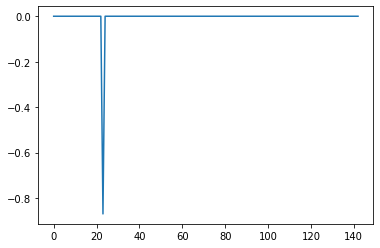

In [26]:
pl.plot(c_c[26,0,:]-c_c[15,0,:])

In [27]:
c_c[100,:,:].sum()

-27.318248838346996

In [38]:
dfd = pd.read_excel('EDGAR/v50_SO2_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('SO2_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,7.31333,58.9124,21.9257,9.13676,5.399,0,7.53526
1,DZA,Algeria,44.4921,28.2735,16.4133,3.14551,17.525,0.173662,78.7476
2,AGO,Angola,52.243,9.72764,4.95511,17.2423,13.8994,0.373009,67.3078
3,ARG,Argentina,68.8705,19.2829,4.27767,2.61729,3.79827,0.1039,488.212
4,ARM,Armenia,0.760302,35.3905,36.4021,7.1735,15.144,0,0.897751
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,71.9406,13.4693,1.03709,2.93446,13.5719,0,64.3651
141,ZMB,Zambia,4.37036,89.3583,0.177224,5.14694,0.0575077,0,130.981
142,ZWE,Zimbabwe,74.257,10.0835,1.09173,9.57924,3.74189,0,86.8001
143,AIR,IntlAIR,0,0,0,0,0,100,185.293


In [51]:
dfd = pd.read_excel('EDGAR/v50_BC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('BC_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.359464,8.72021,49.5809,23.5428,13.9116,0,0.9586
1,DZA,Algeria,3.66506,7.12742,88.3841,0.127739,0.71169,0.0723202,6.99586
2,AGO,Angola,28.2075,2.47577,11.912,28.0216,22.5888,0.0492876,18.8454
3,ARG,Argentina,7.12735,15.8985,24.3639,1.17673,1.7077,0.061371,30.5787
4,ARM,Armenia,0.0636456,0.529425,11.9311,25.1418,53.077,0,0.522974
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,52.8251,20.1752,8.43387,0.488373,2.25873,0,0.796722
141,ZMB,Zambia,26.1597,24.733,0.459698,42.3927,0.473662,0,19.339
142,ZWE,Zimbabwe,3.75059,3.31463,3.68337,61.8688,24.1675,0,15.7583
143,AIR,IntlAIR,0,0,0,0,0,100,6.75807


In [52]:
dfd = pd.read_excel('EDGAR/v50_OC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('OC_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0562195,1.28842,16.6305,42.5529,25.1449,0,1.90521
1,DZA,Algeria,2.37223,3.69322,85.4766,0.583971,3.25355,0.0472879,5.37544
2,AGO,Angola,1.30742,0.780481,3.15881,42.7697,34.4776,0.00911278,51.21
3,ARG,Argentina,0.727925,1.17912,4.64201,1.77938,2.58227,0.0079431,118.702
4,ARM,Armenia,0.0685992,0.399111,3.33515,26.1229,55.1483,0,1.83302
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,4.5856,20.5465,5.30878,0.518915,2.39998,0,1.47947
141,ZMB,Zambia,1.33104,9.38084,0.198709,72.0001,0.804471,0,47.683
142,ZWE,Zimbabwe,0.830549,1.08114,0.899495,64.5453,25.213,0,52.7823
143,AIR,IntlAIR,0,0,0,0,0,100,3.32214


In [53]:
dfd = pd.read_excel('EDGAR/v50_NOx_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('NOx_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.473443,14.3195,71.6197,2.46878,1.45882,0,26.9633
1,DZA,Algeria,30.1889,7.04376,57.8987,0.848245,4.72593,0.30942,449.399
2,AGO,Angola,27.8248,4.97422,49.1634,5.55467,4.47774,1.46511,174.242
3,ARG,Argentina,18.8079,14.4279,45.6893,2.18382,3.1692,0.595628,865.943
4,ARM,Armenia,10.4905,6.75329,65.0749,3.92565,8.28748,0,19.3718
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,66.1971,8.49399,13.2796,0.77308,3.57549,0,55.9083
141,ZMB,Zambia,5.08269,33.2296,24.1152,19.6813,0.219903,0,56.5422
142,ZWE,Zimbabwe,30.4191,6.9111,34.4617,13.758,5.3742,0,83.345
143,AIR,IntlAIR,0,0,0,0,0,100,2313.63


In [54]:
dfd = pd.read_excel('EDGAR/v50_NH3_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('NH3_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0085367,0.0551272,0.467574,0.94032,0.555644,0,39.4425
1,DZA,Algeria,0.451768,0.41122,2.38173,0.0559529,0.311738,0.0287828,73.3885
2,AGO,Angola,19.7045,0.492099,0.031781,13.9439,11.2405,0.0329685,117.627
3,ARG,Argentina,1.64859,1.15113,0.632665,0.306487,0.44478,0.0151746,516.331
4,ARM,Armenia,0.00094787,0.00570268,2.09477,2.56149,5.40759,0,15.0513
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,3.83575,1.15595,0.758004,0.0400587,0.185271,0,42.4277
141,ZMB,Zambia,19.0114,5.50999,0.00585164,21.3909,0.239005,0,119.241
142,ZWE,Zimbabwe,0.261935,0.685439,0.0133544,32.8722,12.8407,0,86.6267
143,AIR,IntlAIR,0,0,0,0,0,100,27.4109


In [55]:
dfd = pd.read_excel('EDGAR/v50_CO_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('CO_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0675596,7.45486,37.6778,30.729,18.158,0,76.0751
1,DZA,Algeria,21.4319,3.79707,75.7894,0.30009,1.67193,0.0718721,639.3
2,AGO,Angola,27.6202,0.402154,22.7351,23.4499,18.9035,0.034971,2412.12
3,ARG,Argentina,3.27664,3.49161,42.1145,0.759442,1.10212,0.0229759,7417.82
4,ARM,Armenia,0.525874,0.333241,24.7209,21.0553,44.45,0,63.4307
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,42.1107,7.36716,30.4119,0.194223,0.898281,0,146.509
141,ZMB,Zambia,32.3591,6.02256,7.3486,46.4813,0.519344,0,1898.01
142,ZWE,Zimbabwe,1.03396,1.20617,10.9805,59.3265,23.1744,0,1663.19
143,AIR,IntlAIR,0,0,0,0,0,100,246.423


In [56]:
dfd = pd.read_excel('EDGAR/v50_NMVOC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic] 
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('NMVOC_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,5.2257,2.74376,26.1762,6.7852,4.00944,0,30.3645
1,DZA,Algeria,55.4008,1.05198,23.969,0.0884144,0.492595,0.00298539,713.48
2,AGO,Angola,63.9027,0.334162,10.6119,9.27599,7.47758,0.00397424,983.946
3,ARG,Argentina,18.0803,4.99296,41.2883,0.974029,1.41353,0.00795528,993.141
4,ARM,Armenia,2.47961,0.737624,20.6704,6.83091,14.4208,0,32.5851
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,17.3326,1.1161,24.2421,0.0751324,0.347487,0,123.501
141,ZMB,Zambia,46.2701,6.24147,5.43712,28.797,0.321754,0,493.523
142,ZWE,Zimbabwe,1.91845,1.4021,11.6191,50.9258,19.8929,0,301.534
143,AIR,IntlAIR,0,0,0,0,0,100,80.3338


In [57]:
dfd = pd.read_excel('EDGAR/v50_CH4_1970_2015c.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
#    print (i)
#    print (dfd.ISO_A3)
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]
cats_inPo=['Main Activity Electricity and Heat Production','Solid Fuels','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation','Railways','Water-borne Navigation','Other Transportation']
cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co).values[:]]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories           
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('CH4_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,5.43322,0.0939899,0.161158,1.33277,0.787546,0,117.436
1,DZA,Algeria,78.9948,0.0194459,0.11185,0.00910227,0.0507127,9.40649e-05,3034.6
2,AGO,Angola,67.3495,0.0130278,0.0979057,2.0346,1.64014,0.000303172,1728.56
3,ARG,Argentina,17.5628,0.0709268,0.313092,0.0751188,0.109014,0.000214118,4944.94
4,ARM,Armenia,16.2644,0.00774452,1.32883,0.944408,1.99375,0,96.177
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,33.903,0.012229,0.0749075,0.00562043,0.0259945,0,548.378
141,ZMB,Zambia,24.0038,0.551024,0.0669879,11.6346,0.129996,0,467.737
142,ZWE,Zimbabwe,4.94163,0.0990616,0.0966505,13.6867,5.34637,0,480.826
143,AIR,IntlAIR,0,0,0,0,0,100,3.70419


In [58]:
dfd = pd.read_excel('EDGAR/v50_N2O_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
#    print (i)
#    print (dfd.ISO_A3)
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]
cats_inPo=['Main Activity Electricity and Heat Production','Solid Fuels','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation','Railways','Water-borne Navigation','Other Transportation']
cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co).values[:]]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories           
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('N2O_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0212379,0.249994,1.39091,1.54359,0.912123,0,3.72681
1,DZA,Algeria,0.684136,18.234,4.45869,0.0440235,0.245274,0.0521737,21.8846
2,AGO,Angola,1.13197,0.180008,0.93321,2.72455,2.19632,0.124722,16.8071
3,ARG,Argentina,0.266341,0.499989,0.752177,1.10262,1.60014,0.0257166,164.687
4,ARM,Armenia,0.135568,0.0449014,3.13056,1.80444,3.80938,0,1.67879
...,...,...,...,...,...,...,...,...,...
140,YEM,Yemen,0.22986,0.0793966,0.467635,0.0838491,0.387802,0,14.732
141,ZMB,Zambia,0.601718,5.06802,0.233547,2.75797,0.0308153,0,25.6014
142,ZWE,Zimbabwe,0.714898,0.246429,0.674081,6.48034,2.53138,0,15.1019
143,AIR,IntlAIR,0,0,0,0,0,28.6349,51.7437


In [15]:
pd.set_option('display.max_rows', None)
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0212379,0.249994,1.39091,0,0,0,3.72681
1,DZA,Algeria,0.684136,18.234,4.45869,0,0,0.0521737,21.8846
2,AGO,Angola,1.13197,0.180008,0.93321,0,0,0.124722,16.8071
3,ARG,Argentina,0.266341,0.499989,0.752177,0,0,0.0257166,164.687
4,ARM,Armenia,0.135568,0.0449014,3.13056,0,0,0,1.67879
5,AUS,Australia,1.8223,9.27328,2.3598,0,0,0.157478,160.85
6,AUT,Austria,3.37739,8.96213,6.77999,0,0,0.0196026,13.6308
7,AZE,Azerbaijan,0.662252,0.0694814,2.04007,0,0,0.207414,7.83649
8,BHR,Bahrain,6.94439,0.512407,9.73864,0,0,0.404517,0.727781
9,BGD,Bangladesh,0.168709,0.221978,0.886813,0,0,0,67.296


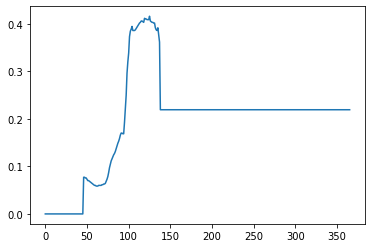

In [16]:
scale=c_c/b_c
pl.plot(scale[:,1,111])


In [59]:
c_c.shape

(366, 8, 143)

CO2 96.72915689726656 -27.318248838346996
CH4 359573.6384177322 -21775.075518220092
N2O 8447.624121561968 -657.4232873817577
SO2 95014.53397420618 -24930.00578878929
BC 4649.249786035137 -1150.8316980775162
OC 11122.632294966532 -1536.944035247291
CO 580122.1605053472 -165283.04075704407
NMVOC 141496.77562706347 -29631.961628550067
NH3 47720.5506568523 -1406.9876903269933
NOx 110327.50746752233 -39386.89550590219


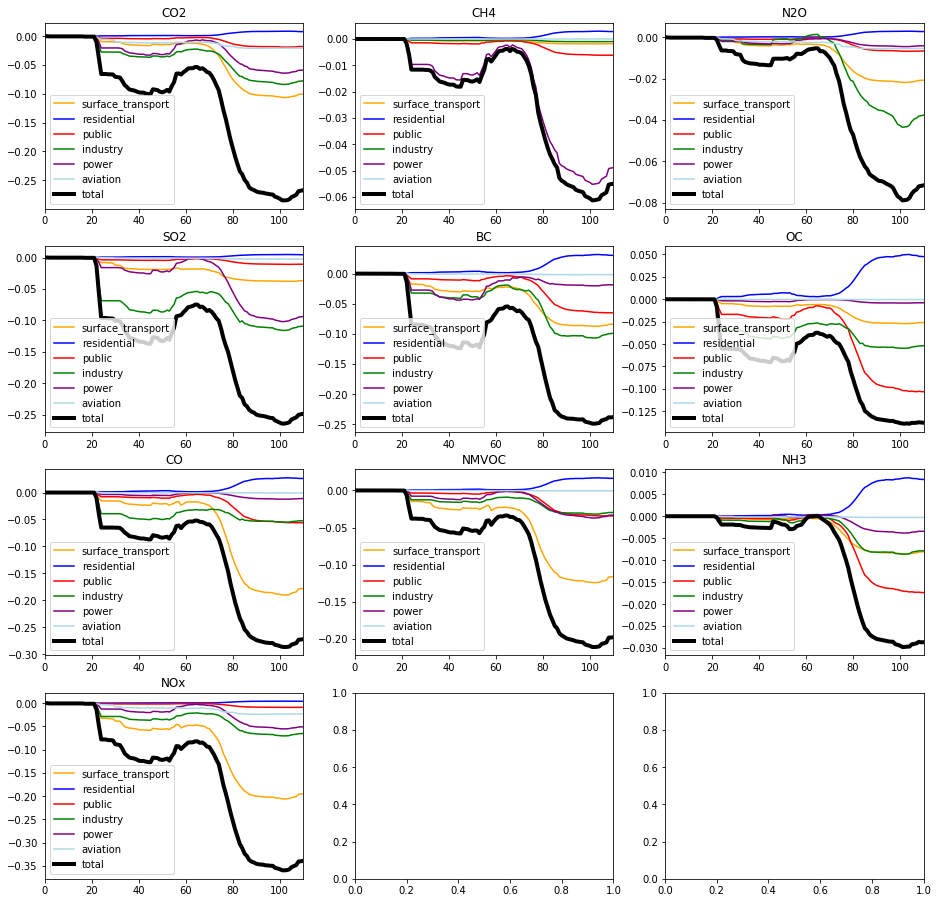

In [60]:
#sum over sectors and countries
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
ix=0
iy=0
c=0


glob_e=np.empty([366,10])
fig, ax = pl.subplots(4,3, figsize=(40/2.54, 40/2.54))
for isp in range(10):
    c=0
    totge=0.0
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl
        shis=gas[:,4]
        shisb=base[:,4] #intl
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        base[:,:]=0.0
        
        for ic in range(143):
            if df.iloc[ic]['Total']>=0: 
                totge=totge+df.iloc[ic]['Total']
      
#                big_c[:,8,ic,isp]=big_c[:,:,ic,isp].sum(axis=1)
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
#            if df.iloc[ic]['Surface_Transport']>=0 and np.all(b_c[0,:,ic]) >0:
            if df.iloc[ic]['Surface_Transport']>=0:
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
                c=c+1
#                print (ic,df.iloc[ic]['ISO_A3'],b_c[0,0,ic],b_c[0,4,ic], c_c[100,0,ic],b_c[100,4,ic])
                gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
                base[:,0]=base[:,0]+df.iloc[ic]['Total']             
                gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
                base[:,1]=base[:,1]+df.iloc[ic]['Total']
                gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
                base[:,2]=base[:,2]+df.iloc[ic]['Total']  
                gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
                base[:,3]=base[:,3]+df.iloc[ic]['Total']
                gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
                base[:,7]=base[:,7]+df.iloc[ic]['Total']
                gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
                base[:,6]=base[:,6]+df.iloc[ic]['Total']
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],ic,gas[80,6],df.iloc[ic]['Aviation']*c_c[80,6,ic])
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/100
        if isp !=8: gas[:,5]=df.iloc[143]['Total']*avis[:]/avisb[:] #no NH3 from planes
        if isp !=8: base[:,5]=df.iloc[143]['Total']
                
        gas[:,4]=df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=df.iloc[144]['Total']
        totge=totge+df.iloc[143]['Total']
        if isp !=8: totge=totge+df.iloc[143]['Total']
 
 
 
    b2=totge
    if isp ==0:
        b2=base[:,:].sum(axis=1)
#    print (isp,base[0,0]+base[0,5]+base[0,4],totge,(base[0,0]+base[0,5]+base[0,4])/totge)
    base[:,0]=b2
    
    ax[iy,ix].plot((gas[:,0]+gas[:,4])/base[:,0],color='orange',label='surface_transport')
    ax[iy,ix].plot(gas[:,1]/base[:,0],color='blue',label='residential')  
    ax[iy,ix].plot(gas[:,2]/base[:,0],color='red',label='public')
    ax[iy,ix].plot(gas[:,3]/base[:,0],color='green',label='industry') 
    ax[iy,ix].plot(gas[:,7]/base[:,0],color='purple',label='power')
#    ax[iy,ix].plot(gas[:,5]/base[:,5],color='purple')
    ax[iy,ix].plot((gas[:,6]+gas[:,5])/base[:,0],color='lightblue',label='aviation')
    ax[iy,ix].plot(gas[:,:].sum(axis=1)/base[:,0],color='black',linewidth=4,label='total')
    ax[iy,ix].set_title(spec[isp])
    ax[iy,ix].legend()
    ax[iy,ix].set_xlim(0,110)
    glob_e[:,isp]=gas[:,:].sum(axis=1)/base[:,0]
    print (spec[isp],base[0,0],gas[100,:].sum())
 
    ix=ix+1
    if ix==3:
        ix=0
        iy=iy+1


OC 11274.943395935736 -1536.944035247291
NOx 123579.74709503283 -39386.89550590219


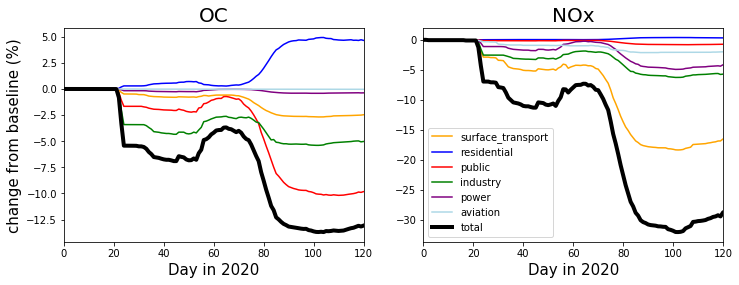

In [61]:
#sum over sectors and countries
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
ix=0
iy=0
c=0


#glob_e=np.empty([366,10])
fig, ax = pl.subplots(1,2, figsize=(30/2.54, 10/2.54))
for isp in range(10):
    c=0
    totge=0.0
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl
        shis=gas[:,4]
        shisb=base[:,4] #intl
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        base[:,:]=0.0
        
        for ic in range(143):
            if df.iloc[ic]['Total']>=0: 
                totge=totge+df.iloc[ic]['Total']
      
#                big_c[:,8,ic,isp]=big_c[:,:,ic,isp].sum(axis=1)
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
#            if df.iloc[ic]['Surface_Transport']>=0 and np.all(b_c[0,:,ic]) >0:
            if df.iloc[ic]['Surface_Transport']>=0: 
                c=c+1
#                print (ic,df.iloc[ic]['ISO_A3'],b_c[0,0,ic],b_c[0,4,ic], c_c[100,0,ic],b_c[100,4,ic])
                gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
                base[:,0]=base[:,0]+df.iloc[ic]['Total']             
                gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
                base[:,1]=base[:,1]+df.iloc[ic]['Total']
                gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
                base[:,2]=base[:,2]+df.iloc[ic]['Total']  
                gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
                base[:,3]=base[:,3]+df.iloc[ic]['Total']
                gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
                base[:,7]=base[:,7]+df.iloc[ic]['Total']
                gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
                base[:,6]=base[:,6]+df.iloc[ic]['Total']
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],ic,gas[80,6],df.iloc[ic]['Aviation']*c_c[80,6,ic])
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/100
        if isp !=8: gas[:,5]=df.iloc[143]['Total']*avis[:]/avisb[:] #no NH3 from planes
        if isp !=8: base[:,5]=df.iloc[143]['Total']
                
        gas[:,4]=df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=df.iloc[144]['Total']
        totge=totge+df.iloc[144]['Total']
        if isp !=8: totge=totge+df.iloc[143]['Total']
 
 
    if isp ==5 or isp==9:
        ix=1
        if isp==5: ix=0
        b2=totge
        if isp ==0:
            b2=base[:,:].sum(axis=1)
    #    print (isp,base[0,0]+base[0,5]+base[0,4],totge,(base[0,0]+base[0,5]+base[0,4])/totge)
        base[:,0]=b2

        ax[ix].plot(100*(gas[:,0]+gas[:,4])/base[:,0],color='orange',label='surface_transport')
        ax[ix].plot(100*gas[:,1]/base[:,0],color='blue',label='residential')  
        ax[ix].plot(100*gas[:,2]/base[:,0],color='red',label='public')
        ax[ix].plot(100*gas[:,3]/base[:,0],color='green',label='industry') 
        ax[ix].plot(100*gas[:,7]/base[:,0],color='purple',label='power')
    #    ax[iy,ix].plot(gas[:,5]/base[:,5],color='purple')
        ax[ix].plot(100*(gas[:,6]+gas[:,5])/base[:,0],color='lightblue',label='aviation')
        ax[ix].plot(100*gas[:,:].sum(axis=1)/base[:,0],color='black',linewidth=4,label='total')
        ax[ix].set_title(spec[isp],fontsize=20)
        if isp==9: ax[ix].legend(fontsize=10)
        ax[ix].set_xlim(0,120)
        ax[ix].set_xlabel('Day in 2020',fontsize=15)
        if ix==0: ax[ix].set_ylabel('change from baseline (%)',fontsize=15)
#        glob_e[:,sp]=gas[:,:].sum(axis=1)/base[:,0]
        print (spec[isp],base[0,0],gas[100,:].sum())
 


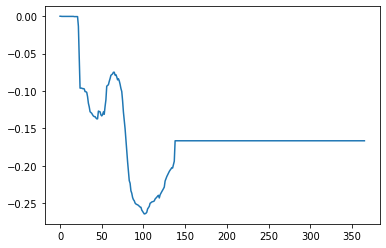

In [62]:
pl.plot(glob_e[:,3])

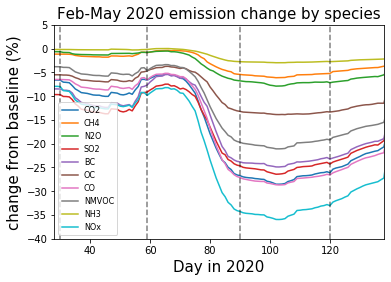

In [63]:
#plot emissions and forcing
fig, ax = pl.subplots(1,1, figsize=(15/2.54, 10/2.54))
for i in range(10):
    ax.plot(np.arange(366)+1,100*glob_e[:,i],label=spec[i])
ax.legend(fontsize=8)

days = [30, 59,90,120,151]
for day in days:
    ax.axvline(x=day, color='k', linestyle='--', alpha=0.5)
ax.set_xlim(28,138)
ax.set_ylim(-40,5)
ax.set_xlabel('Day in 2020',fontsize=15)
ax.set_ylabel('change from baseline (%)',fontsize=15)
ax.set_title('Feb-May 2020 emission change by species',fontsize=15)
pl.savefig('Fig2a.pdf')

0 96.72915689726656 96.72915689726656 1.0
1 131785.8475464364 360568.32370170375 0.3654948005234706
2 1860.0895264782084 8578.977957016432 0.21681947847376265
3 105777.75568898121 104267.77158532038 1.0144817912639978
4 5025.877332933561 4953.779363757285 1.0145541341028947
5 8596.8825509891 11274.943395935736 0.7624767813990097
6 523360.91229152645 580706.3940212335 0.9012487509693061
7 106059.59335496077 146388.8486762511 0.7245059600784126
8 6431.234123927319 47694.54729135371 0.1348421253406719
9 120277.4685149407 123579.74709503283 0.9732781571599052


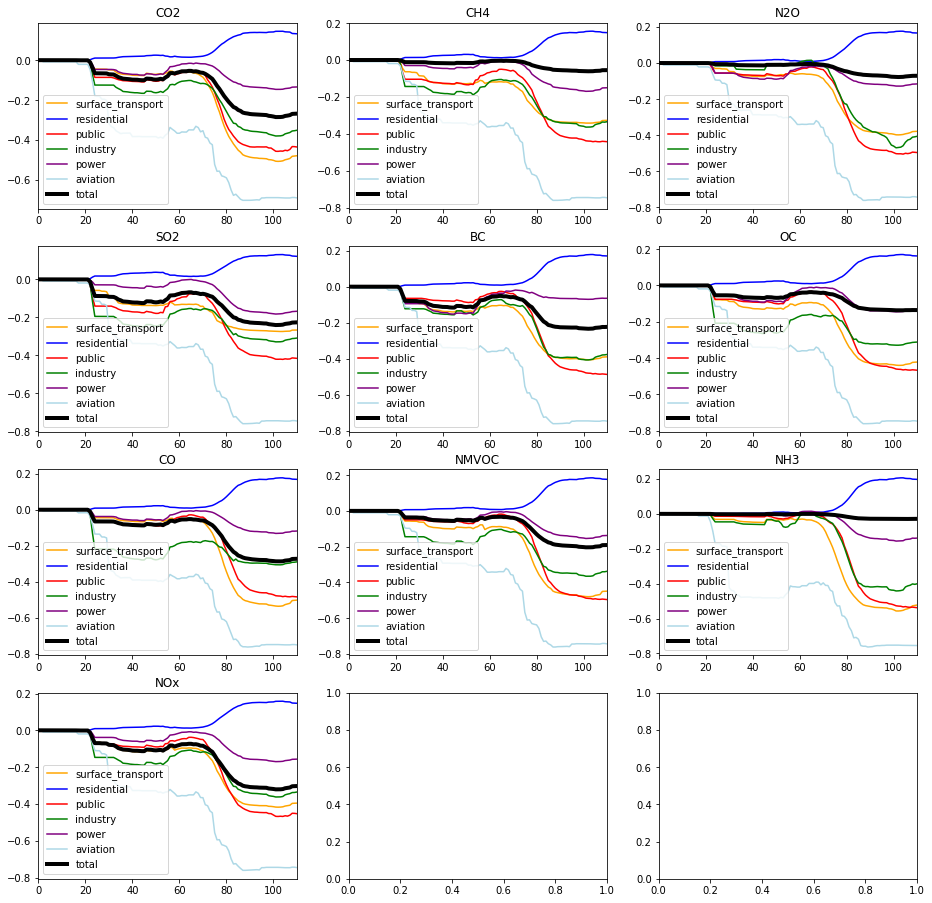

In [64]:
#sum over sectors and countries
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
ix=0
iy=0
c=0
#glob_e=np.empty([366,10])
fig, ax = pl.subplots(4,3, figsize=(40/2.54, 40/2.54))
for isp in range(10):
    c=0
    totge=0.0
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl
        shis=gas[:,4]
        shisb=base[:,4] #intl
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        base[:,:]=0.0
        
        for ic in range(143):
            if df.iloc[ic]['Total']>=0: 
                totge=totge+df.iloc[ic]['Total']
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
#            if df.iloc[ic]['Surface_Transport']>=0 and np.all(b_c[0,:,ic]) >0:
            if df.iloc[ic]['Surface_Transport']>=0: 
                c=c+1
#                print (ic,df.iloc[ic]['ISO_A3'],df.iloc[ic]['Surface_Transport']+df.iloc[ic]['Residential']+
#                      df.iloc[ic]['Public']+df.iloc[ic]['Industry']+df.iloc[ic]['Power']+df.iloc[ic]['Aviation'])
                gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
                base[:,0]=base[:,0]+df.iloc[ic]['Total']*df.iloc[ic]['Surface_Transport']/100             
                gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
                base[:,1]=base[:,1]+df.iloc[ic]['Total']*df.iloc[ic]['Residential']/100
                gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
                base[:,2]=base[:,2]+df.iloc[ic]['Total']*df.iloc[ic]['Public']/100
                gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
                base[:,3]=base[:,3]+df.iloc[ic]['Total']*df.iloc[ic]['Industry']/100
                gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
                base[:,7]=base[:,7]+df.iloc[ic]['Total']*df.iloc[ic]['Power']/100
                gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
                base[:,6]=base[:,6]+df.iloc[ic]['Total']*df.iloc[ic]['Aviation']/100
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],ic,gas[80,6],df.iloc[ic]['Aviation']*c_c[80,6,ic])
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/100
        if isp !=8: gas[:,5]=df.iloc[143]['Total']*avis[:]/avisb[:] #no NH3 from planes
        if isp !=8: base[:,5]=df.iloc[143]['Total']
                
        gas[:,4]=df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=df.iloc[144]['Total']
        totge=totge+df.iloc[144]['Total']
        if isp !=8: totge=totge+df.iloc[143]['Total']
    b2=totge
    if isp ==0:
        totge=base[0,:].sum()
    print (isp,base[0,:].sum(),totge,base[0,:].sum()/totge)
#    base[:,0]=b2
    ax[iy,ix].plot((gas[:,0]+gas[:,4])/(base[:,0]+base[:,4]),color='orange',label='surface_transport')
    ax[iy,ix].plot(gas[:,1]/base[:,1],color='blue',label='residential')  
    ax[iy,ix].plot(gas[:,2]/base[:,2],color='red',label='public')
    ax[iy,ix].plot(gas[:,3]/base[:,3],color='green',label='industry') 
    ax[iy,ix].plot(gas[:,7]/base[:,7],color='purple',label='power')
#    ax[iy,ix].plot(gas[:,5]/base[:,5],color='purple')
    ax[iy,ix].plot((gas[:,6]+gas[:,5])/(base[:,5]+base[:,6]),color='lightblue',label='aviation')
#    ax[iy,ix].plot(gas[:,:].sum(axis=1)/base[:,:].sum(axis=1),color='black',linewidth=4,label='total')
    ax[iy,ix].plot(gas[:,:].sum(axis=1)/totge,color='black',linewidth=4,label='total')
    ax[iy,ix].set_title(spec[isp])
    ax[iy,ix].legend()
    ax[iy,ix].set_xlim(0,110)
#    glob_e[:,isp]=gas[:,:].sum(axis=1)/base[:,0]
 
    ix=ix+1
    if ix==3:
        ix=0
        iy=iy+1

In [65]:
file='CH4_Corinne_Edgar.csv'
df=pd.read_csv(file)
df

,Unnamed: 0,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,0,ALB,Albania,5.433215,0.093990,0.161158,1.332771,0.787546,0.000000,117.436492
1,1,DZA,Algeria,78.994751,0.019446,0.111850,0.009102,0.050713,0.000094,3034.601362
2,2,AGO,Angola,67.349476,0.013028,0.097906,2.034599,1.640136,0.000303,1728.556541
3,3,ARG,Argentina,17.562772,0.070927,0.313092,0.075119,0.109014,0.000214,4944.937201
4,4,ARM,Armenia,16.264375,0.007745,1.328830,0.944408,1.993750,0.000000,96.177006
...,...,...,...,...,...,...,...,...,...,...
140,140,YEM,Yemen,33.903004,0.012229,0.074907,0.005620,0.025994,0.000000,548.377720
141,141,ZMB,Zambia,24.003758,0.551024,0.066988,11.634606,0.129996,0.000000,467.737158
142,142,ZWE,Zimbabwe,4.941634,0.099062,0.096650,13.686718,5.346374,0.000000,480.825824
143,143,AIR,IntlAIR,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3.704185


In [66]:
glob_e.shape

(366, 10)

In [67]:
#make data for Tom for ech gas: country, sector, emissions per sector, Julian day, % change
#CO2 Mt per day others are Gg per year. (kt) so divide by 366 to gt kt/day
#tom=pd.DataFrame(columns=)

In [68]:
print (28**0.5)

5.291502622129181


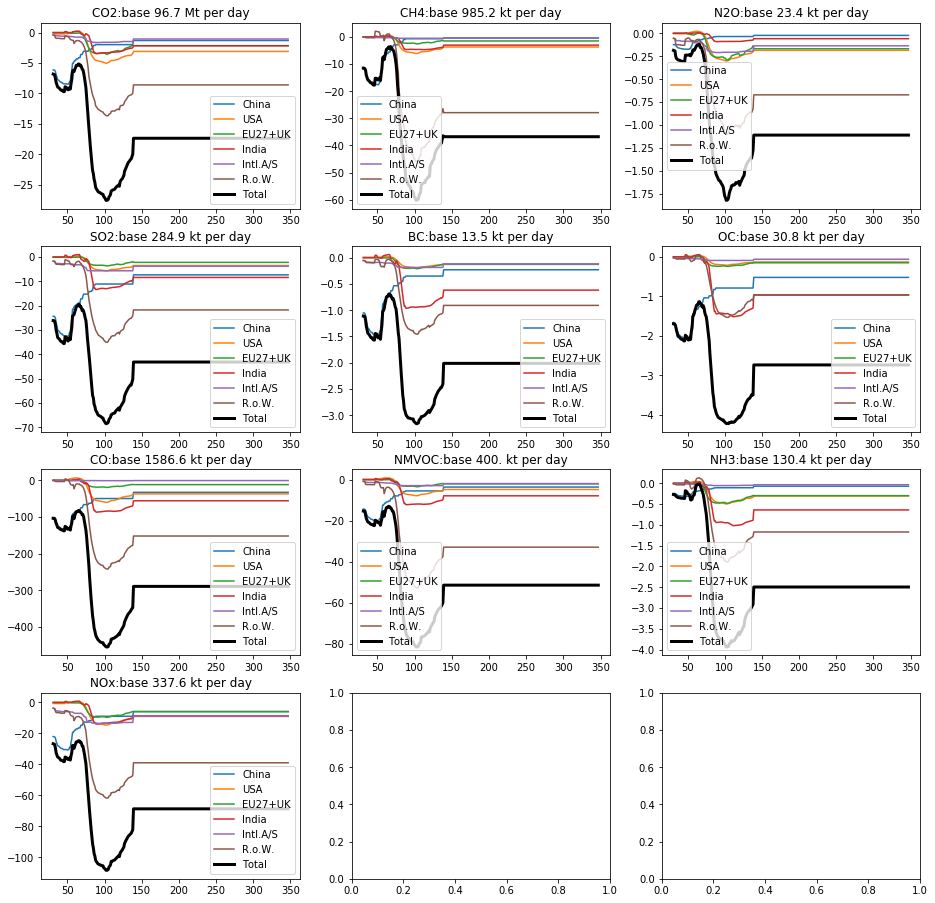

In [73]:
fig, ax = pl.subplots(4,3, figsize=(40/2.54, 40/2.54))
ix=0
iy=0
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
js=np.arange(120)
js =js.astype(str)
for isp in range(10):
    file='CH4_Corinne_Edgar.csv'
    df=pd.read_csv(file)
    cols=df['ISO_A3'].tolist()
    names=df['Name'].tolist()
    dftom=pd.DataFrame(data={'Type':['Name','Units','Base_em']+(np.arange(366)+1).tolist()})
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl air
        shis=gas[:,4]
        shisb=base[:,4] #intl shipping
        gas=c_c[:,0,:]+c_c[:,1,:]+c_c[:,2,:]+c_c[:,3,:]+c_c[:,6,:]+c_c[:,7,:]
        base=b_c[:,0,:]+b_c[:,1,:]+b_c[:,2,:]+b_c[:,3,:]+b_c[:,6,:]+b_c[:,7,:]
        for ist in range (143):
            dftom[cols[ist]]=[names[ist],'MtperdayCO2',base[0,ist]]+gas[:,ist].tolist()
        dftom['AIR']=[names[143],'MtperdayCO2',avisb[0]]+avis[:].tolist()
        dftom['SEA']=[names[144],'MtperdayCO2',shisb[0]]+shis[:].tolist()
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        for ic in range(143):
            gas=np.empty([366,8])
            gas[:,:]=0.0
            base=gas.copy()
            base[:,:]
#            print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'])
#            if df.iloc[ic]['Surface_Transport']>=0:
#                print (ic,np.mean(c_c[:,4,ic]/b_c[:,4,ic]))
            gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
            base[:,0]=base[:,0]+100*df.iloc[ic]['Total']/100
            gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
            base[:,1]=base[:,1]+100*df.iloc[ic]['Total']/100
            gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
            base[:,2]=base[:,2]+100*df.iloc[ic]['Total']/100  
            gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
            base[:,3]=base[:,3]+100*df.iloc[ic]['Total']/100
            gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
            base[:,7]=base[:,7]+100*df.iloc[ic]['Total']/100
            gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
            base[:,6]=base[:,6]+100*df.iloc[ic]['Total']/100 
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],base[0,0],base[0,2],base[0,:].sum()/366)
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/10
            base[:,:]=base[:,:]/365
            gas[:,:]=gas[:,:]/365
            dftom[cols[ic]]=[names[ic],'ktperday'+spec[isp],base[0,0]]+(gas[:,:]).sum(axis=1).tolist()

        gas[:,5]=gas[:,5]+df.iloc[143]['Total']*avis[:]/avisb[:]
        base[:,5]=base[:,5]+100*df.iloc[143]['Total']/100.0
        gas[:,4]=gas[:,4]+df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=base[:,4]+100*df.iloc[144]['Total']/100.0
        base[:,:]=base[:,:]/366
        gas[:,:]=gas[:,:]/366
        dftom['AIR']=[names[143],'Ktperday'+spec[isp],base[0,5]]+gas[:,5].tolist()
        dftom['SEA']=[names[144],'Ktperday'+spec[isp],base[0,4]]+gas[:,4].tolist()
    #save file
    dftom.to_csv('2020_Emission_change_national'+spec[isp]+'_high_V2.csv')
#    if isp == 0: 
#        fempty
    EU28=['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST',
      'FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE', 'GBR']

   
    x=1+np.arange(366)
    lab=['China','USA','EU27+UK','India','Intl.A/S','R.o.W.']
    for i in range(6):
        if i==0:y=dftom.iloc[33:350]['CHN']
        if i==1:y=dftom.iloc[33:350]['USA']
        if i==2:y=dftom.iloc[33:350][EU28].sum(axis=1)
        if i==3:y=dftom.iloc[33:350]['IND']
        if i==4:y=dftom.iloc[33:350]['AIR']+dftom.iloc[33:350]['SEA']
        if i==5: 
            y=dftom.iloc[33:350,1:].sum(axis=1)-dftom.iloc[33:350][EU28].sum(axis=1)-dftom.iloc[33:350]['USA']-dftom.iloc[33:350]['IND']-dftom.iloc[33:350]['CHN']
        ax[iy,ix].plot(x[30:347],y,label=lab[i])
    ax[iy,ix].plot(x[30:347],dftom.iloc[33:350,1:].sum(axis=1),color='black',linewidth=3,label='Total')
    ax[iy,ix].legend(fontsize=10)
    tot=np.array2string(dftom.iloc[2,1:].sum(),precision=1)
    if isp==0: ax[iy,ix].set_title(spec[isp]+':base '+ tot+' Mt per day')
    if isp != 0: ax[iy,ix].set_title(spec[isp]+':base '+ tot+' kt per day')
    ix=ix+1
    if ix==3:
        ix=0
        iy=iy+1


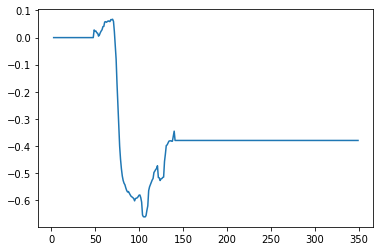

In [74]:
pl.plot(dftom.POL[3:350])

In [75]:
dftom.shape

(369, 146)

recession = 5.9% rebound from a 1.4% recession. out did recession and then added 4.5%.
December 2021. 1. 4.5% above baseline, 2 stays half low
December 2030.  no climate policy change, rebound policy (10% increase, moderrate green stimulus (36% decrease)
Start from 1 may: Jday 31+28+31+30+1, but take one off for position in array


In [76]:
#120
print (glob_e[365,:])
bdata=glob_e.copy()
bdata[:,:]=1
ge=pd.DataFrame(data=1+glob_e[:366,:],columns=spec)
be=pd.DataFrame(data=bdata[:366,:],columns=spec)
import datetime
dt=2020+0.5/366+np.arange(366)/366
ge['date']=dt
be['date']=dt

[-0.17970079 -0.03744616 -0.04812299 -0.16644961 -0.1585612  -0.08996828
 -0.18246048 -0.13297148 -0.01886434 -0.22783236]


In [77]:
#continue to  1 jan 2022
data=np.zeros(10)
data[:]=1
ge.loc['366']=(1+glob_e[365,:]).tolist()+[2022.0]
be.loc['366']=data.tolist()+[2022.0]

In [78]:
#add 1 jan 2023 for long blip
ge1=ge.copy()
ge1.loc['367']=(1+glob_e[365,:]/2).tolist()+[2023.0]
ge2=ge.copy()
data=np.zeros(10)
data[:]=1.045
ge2.loc['367']=data.tolist()+[2023.0]
data[:]=1
be.loc['367']=data.tolist()+[2023.0]
ge3=ge.copy()
data=np.zeros(10)
data[:]=1.0
ge3.loc['367']=data.tolist()+[2023.0]

In [79]:
#add DEc2030 and 2100
ge1_1=ge1.copy()
data=np.zeros(10)
data[:]=1.0
ge1_1.loc['368']=(data).tolist()+[2030.0]
#ge1_1.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge1_2=ge1.copy()
data=np.zeros(10)
data[:]=1.1
ge1_2.loc['368']=data.tolist()+[2030.0]
#ge1_2.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge1_3=ge1.copy()
data=np.zeros(10)
data[:]=0.64
ge1_3.loc['368']=data.tolist()+[2030.0]
#ge1_3.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge2_1=ge2.copy()
data=np.zeros(10)
data[:]=1.0
ge2_1.loc['368']=(data).tolist()+[2030.0]
#ge2_1.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge2_2=ge2.copy()
data=np.zeros(10)
data[:]=1.1
ge2_2.loc['368']=data.tolist()+[2030.0]
#ge2_2.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge2_3=ge2.copy()
data=np.zeros(10)
data[:]=0.64
ge2_3.loc['368']=data.tolist()+[2030.0]
#ge2_3.loc['122']=(np.zeros(10)).tolist()+[2100.0]

data[:]=1
ge3.loc['368']=data.tolist()+[2030.0]
#ge3.loc['122']=(np.zeros(10)).tolist()+[2100.0]
be.loc['368']=data.tolist()+[2030.0]
#be.loc['122']=(np.zeros(10)).tolist()+[2100.0]

In [80]:
ge2_2

,CO2,CH4,N2O,SO2,BC,OC,CO,NMVOC,NH3,NOx,date
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2020.001366
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2020.004098
2,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.99999,0.999926,0.999999,0.999442,2020.006831
3,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.99999,0.999926,0.999999,0.999442,2020.009563
4,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.99999,0.999926,0.999999,0.999442,2020.012295
...,...,...,...,...,...,...,...,...,...,...,...
364,0.820299,0.962554,0.951877,0.833550,0.841439,0.910032,0.81754,0.867029,0.981136,0.772168,2020.995902
365,0.820299,0.962554,0.951877,0.833550,0.841439,0.910032,0.81754,0.867029,0.981136,0.772168,2020.998634
366,0.820299,0.962554,0.951877,0.833550,0.841439,0.910032,0.81754,0.867029,0.981136,0.772168,2022.000000
367,1.045000,1.045000,1.045000,1.045000,1.045000,1.045000,1.04500,1.045000,1.045000,1.045000,2023.000000


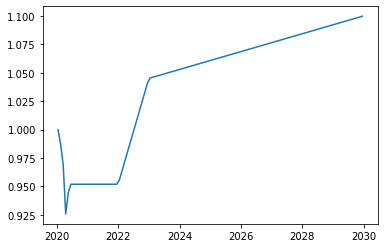

In [81]:
#interoplate
from scipy.interpolate import interp1d
import numpy as np
x=be.date
y=ge2_2.drop(['date'],axis=1).to_numpy()
fc = interp1d(x, y,axis=0,kind = 'linear')


xmonth=2020.0+0.5/12+np.arange(12*10)/12
ymonthge2_2=fc(xmonth)
xmonth.shape
y=ge1_3.drop(['date'],axis=1).to_numpy()
fc = interp1d(x, y,axis=0,kind = 'linear')
ymonthge1_3=fc(xmonth)
y=ge3.drop(['date'],axis=1).to_numpy()
fc = interp1d(x, y,axis=0,kind = 'linear')
ymonthge3=fc(xmonth)

pl.plot(xmonth[:],ymonthge2_2[:,2])

(0, 2)

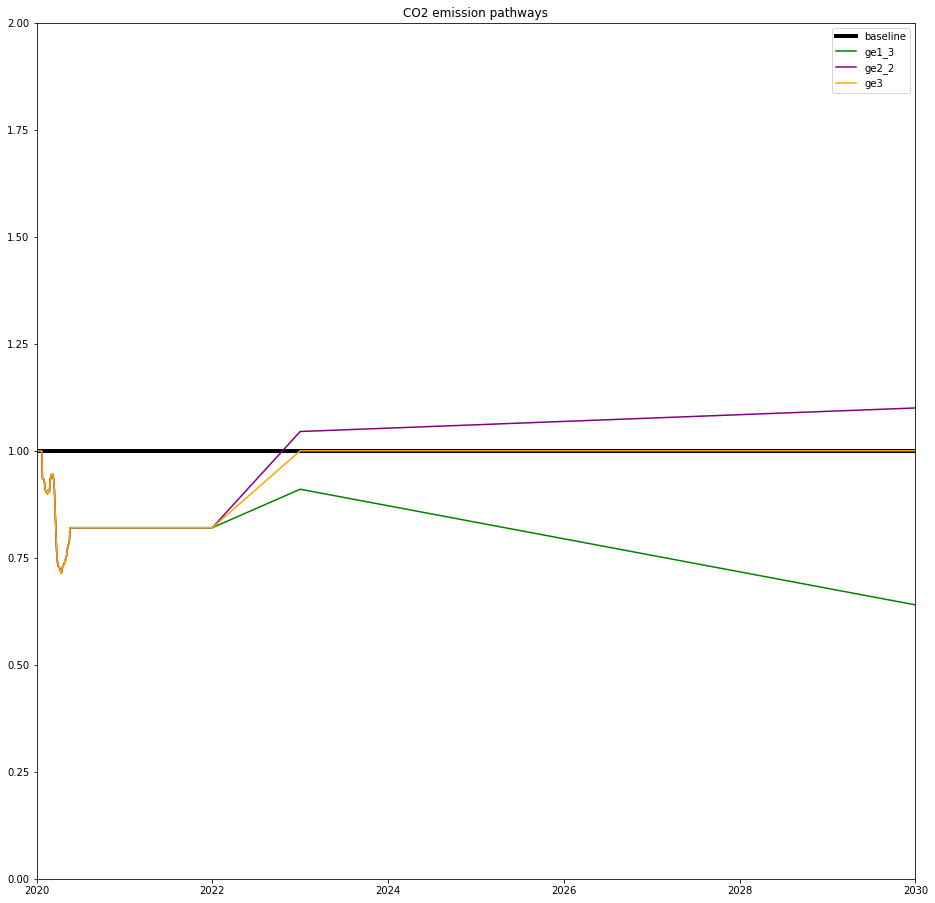

In [82]:
import matplotlib.pyplot as pl

fig, ax = pl.subplots(1,1, figsize=(40/2.54, 40/2.54))
ax.plot(be.date,be.CO2,label='baseline',color='black',linewidth=4)
#ax.plot(be.date,ge1_1.CO2*50,color='red',label='ge1_1')
#ax.plot(be.date,ge1_2.CO2*50,label='ge1_2',color='pink')
ax.plot(be.date,ge1_3.CO2,label='ge1_3',color='green')
#ax.plot(be.date,ge2_1.CO2*50,color='blue',label='ge2_1')
ax.plot(be.date,ge2_2.CO2,label='ge2_2',color='purple')
#ax.plot(xmonth,ymonth[:,0],label='inter',color='pink')
#ax.plot(be.date,ge2_3.CO2*50,label='ge2_3',color='lightblue')
ax.plot(be.date,ge3.CO2,label='ge3',color='orange')
ax.set_title('CO2 emission pathways')
ax.legend()
ax.set_xlim(2020.0, 2030)
ax.set_ylim(0, 2)

In [83]:
import numpy as np

import fair
import fair
fair.__version__
from fair.tools.magicc import scen_open
from fair.constants import molwt

#new data from joeri
emissions_ndc= scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/Baseline.SCEN') 
emissions_g2_2 = scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/FossilRecovery.SCEN') 
emissions_g1_3 = scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/GreenRecovery.SCEN') 
emissions_g4 = scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/StrongGreen.SCEN') 
#doesn't need scaling, from joeri




In [84]:
timew=1765.0+np.arange(285*12+1)/12
f1 = interp1d(emissions_ndc[:,0], emissions_ndc,axis=0,kind = 'linear')
f2 = interp1d(emissions_g2_2[:,0], emissions_g2_2,axis=0,kind = 'linear')
f3 = interp1d(emissions_g1_3[:,0], emissions_g1_3,axis=0,kind = 'linear')
f4 = interp1d(emissions_g4[:,0], emissions_g4,axis=0,kind = 'linear')

In [85]:
emissions_month_base = f1(timew)
emissions_month_g2_2 = f2(timew)
emissions_month_g1_3 = f3(timew)
emissions_month_g3 = f1(timew)
emissions_month_g4 = f4(timew)

In [86]:
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
#YEARS FossilCO2  OtherCO2 CH4 N2O SOx  CO NMVOC NOx BC  OC   NH3    
#CO2, then CH4 N2O SOx  CO NMVOCNOx BC  OC   NH3
np=range(255*12,255*12+120)
emissions_month_g2_2[np,1]=emissions_month_g2_2[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g2_2[np,2]=emissions_month_g2_2[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g2_2[np,3]=emissions_month_g2_2[np,3]*ymonthge3[:,1]#CH4
emissions_month_g2_2[np,4]=emissions_month_g2_2[np,4]*ymonthge3[:,2]#N2O
emissions_month_g2_2[np,5]=emissions_month_g2_2[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g2_2[np,6]=emissions_month_g2_2[np,6]*ymonthge3[:,6]#CO
emissions_month_g2_2[np,7]=emissions_month_g2_2[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g2_2[np,8]=emissions_month_g2_2[np,8]*ymonthge3[:,9]#NOx
emissions_month_g2_2[np,9]=emissions_month_g2_2[np,9]*ymonthge3[:,4]#BC
emissions_month_g2_2[np,10]=emissions_month_g2_2[np,10]*ymonthge3[:,5]#OC
emissions_month_g2_2[np,11]=emissions_month_g2_2[np,11]*ymonthge3[:,8]#NH3

emissions_month_g1_3[np,1]=emissions_month_g1_3[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g1_3[np,2]=emissions_month_g1_3[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g1_3[np,3]=emissions_month_g1_3[np,3]*ymonthge3[:,1]#CH4
emissions_month_g1_3[np,4]=emissions_month_g1_3[np,4]*ymonthge3[:,2]#N2O
emissions_month_g1_3[np,5]=emissions_month_g1_3[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g1_3[np,6]=emissions_month_g1_3[np,6]*ymonthge3[:,6]#CO
emissions_month_g1_3[np,7]=emissions_month_g1_3[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g1_3[np,8]=emissions_month_g1_3[np,8]*ymonthge3[:,9]#NOx
emissions_month_g1_3[np,9]=emissions_month_g1_3[np,9]*ymonthge3[:,4]#BC
emissions_month_g1_3[np,10]=emissions_month_g1_3[np,10]*ymonthge3[:,5]#OC
emissions_month_g1_3[np,11]=emissions_month_g1_3[np,11]*ymonthge3[:,8]#NH3

emissions_month_g3[np,1]=emissions_month_g3[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g3[np,2]=emissions_month_g3[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g3[np,3]=emissions_month_g3[np,3]*ymonthge3[:,1]#CH4
emissions_month_g3[np,4]=emissions_month_g3[np,4]*ymonthge3[:,2]#N2O
emissions_month_g3[np,5]=emissions_month_g3[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g3[np,6]=emissions_month_g3[np,6]*ymonthge3[:,6]#CO
emissions_month_g3[np,7]=emissions_month_g3[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g3[np,8]=emissions_month_g3[np,8]*ymonthge3[:,9]#NOx
emissions_month_g3[np,9]=emissions_month_g3[np,9]*ymonthge3[:,4]#BC
emissions_month_g3[np,10]=emissions_month_g3[np,10]*ymonthge3[:,5]#OC
emissions_month_g3[np,11]=emissions_month_g3[np,11]*ymonthge3[:,8]#NH3

emissions_month_g4[np,1]=emissions_month_g4[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g4[np,2]=emissions_month_g4[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g4[np,3]=emissions_month_g4[np,3]*ymonthge3[:,1]#CH4
emissions_month_g4[np,4]=emissions_month_g4[np,4]*ymonthge3[:,2]#N2O
emissions_month_g4[np,5]=emissions_month_g4[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g4[np,6]=emissions_month_g4[np,6]*ymonthge3[:,6]#CO
emissions_month_g4[np,7]=emissions_month_g4[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g4[np,8]=emissions_month_g4[np,8]*ymonthge3[:,9]#NOx
emissions_month_g4[np,9]=emissions_month_g4[np,9]*ymonthge3[:,4]#BC
emissions_month_g4[np,10]=emissions_month_g4[np,10]*ymonthge3[:,5]#OC
emissions_month_g4[np,11]=emissions_month_g4[np,11]*ymonthge3[:,8]#NH3

(2008, 2050)

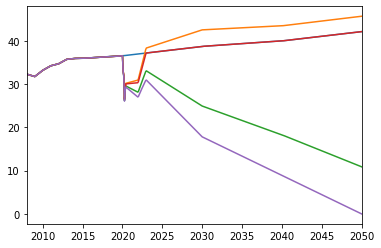

In [87]:
pl.plot(emissions_month_base[:,0],emissions_month_base[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g2_2[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g1_3[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g3[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g4[:,1]*3.7)
pl.xlim(2008,2050)

In [88]:
import numpy as np
np.arange(70*12).shape

(840,)

(2005, 2060)

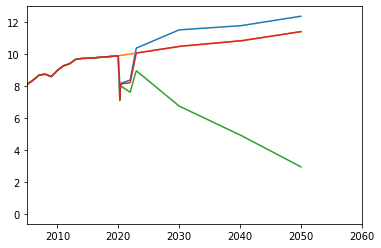

In [89]:
pl.plot(emissions_month_g2_2[:,0],emissions_month_g2_2[:,1])
pl.plot(emissions_month_g2_2[:,0],emissions_month_base[:,1])
pl.plot(emissions_month_g1_3[:,0],emissions_month_g1_3[:,1])
pl.plot(emissions_month_g1_3[:,0],emissions_month_g3[:,1])
pl.xlim(2005,2060)

In [90]:
import numpy as np
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g2_2',emissions_month_g2_2)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_base',emissions_month_base)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g1_3',emissions_month_g1_3)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g3',emissions_month_g3)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g4',emissions_month_g4)

In [91]:
from fair.ancil import natural, cmip6_volcanic, cmip6_solar, historical_scaling
import numpy as np
n=natural.Emissions.emissions
n=n[:-50]
print(n[300,:])
x=np.arange(686)+1765.0
print (cmip6_volcanic.Forcing.volcanic.shape)
fcn = interp1d(x, n,axis=0,kind = 'linear')
fcs = interp1d(x,cmip6_solar.Forcing.solar[:-50] ,axis=0,kind = 'linear')
fcv = interp1d(x,cmip6_volcanic.Forcing.volcanic[:-50] ,axis=0,kind = 'linear')
xmonth=1765.0+np.arange(285*12+1)/12
fn = interp1d(x, n,axis=0,kind = 'linear')
fv = interp1d(x,cmip6_volcanic.Forcing.volcanic[:-50] ,axis=0,kind = 'linear')
fs = interp1d(x,cmip6_solar.Forcing.solar[:-50] ,axis=0,kind = 'linear')

natural_e=fn(xmonth)
solarf=fs(xmonth)
volcanicf=fv(xmonth)
volcanicf.shape

[190.5807   8.9883]
(736,)


(3421,)

In [92]:
n.shape

(686, 2)

In [93]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
natural_e.shape

(3421, 2)

In [95]:
solarf.shape

(3421,)

In [96]:
solarf[:]=0
volcanicf[:]=0

In [97]:
np.save('/Users/earpmf/PYTHON/Piers-climate/data/solarf_month',solarf)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/volcanicf_month',volcanicf)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/naturale_month',natural_e)

In [98]:
+2100-1765

335

(2010, 2075)

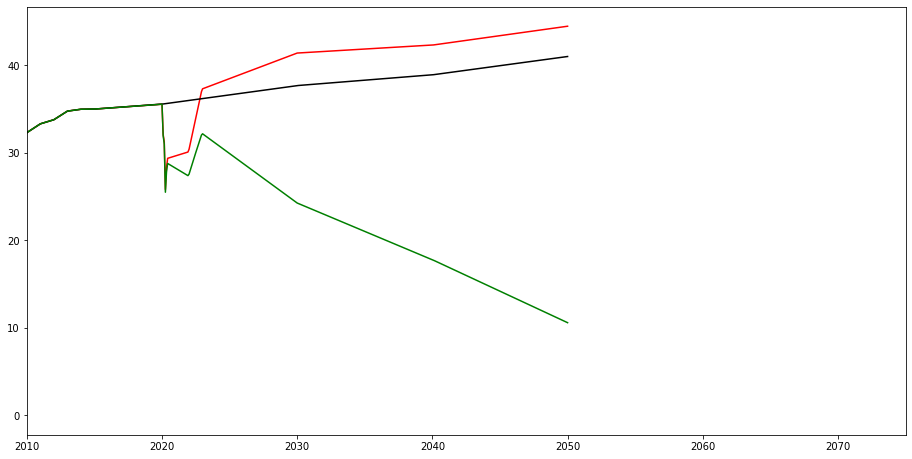

In [99]:

fig, ax = pl.subplots(1,1, figsize=(40/2.54, 20/2.54))
i=1
ax.plot(emissions_month_g2_2[:,0],emissions_month_g2_2[:,i]*3.6,color='red')
ax.plot(emissions_month_base[:,0],emissions_month_base[:,i]*3.6,color='black')
ax.plot(emissions_month_g2_2[:,0],emissions_month_g1_3[:,i]*3.6,color='green')

ax.set_xlim(2010,2075)
